In [23]:
import albumentations as A
import cv2
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from IPython.display import Image
from random import choice, randrange
%matplotlib inline

In [2]:
import collections
collections.Iterable = collections.abc.Iterable

In [4]:
def visualize(image, sz=(10, 10)):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

def read_image(directory, img_name):
    return cv2.cvtColor(cv2.imread(f'{directory}/{img_name}'), cv2.COLOR_RGB2BGR)

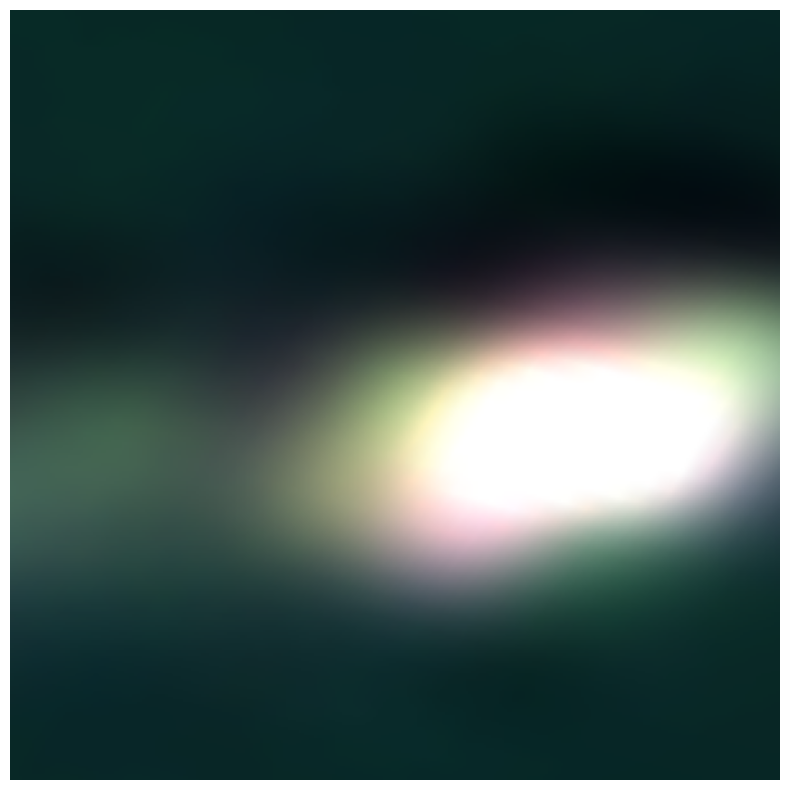

In [107]:
visualize(read_image('ships', '2_81.92.png'))

In [108]:
imgs = []
for file in os.listdir('ships/'):
    imgs.append(read_image('ships', file))

In [99]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.IAAAdditiveGaussianNoise(),
            A.GaussNoise(),
        ], p=0.2),
        A.OneOf([
            A.MotionBlur(p=.6),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.625, scale_limit=.2, rotate_limit=125, p=0.8),
        A.OpticalDistortion(p=0.95),
        A.GridDistortion(p=0.95),
        A.IAAPiecewiseAffine(p=0.95),
        A.SafeRotate(limit=randrange(0, 120), always_apply=True, p=0.95),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.5),
    ])

In [47]:
sf_tranform = A.SafeRotate(limit=randrange(0, 350), border_mode=choice([1,2,3,4]), always_apply=True)

In [71]:
ship = read_image('ships', '2_1678550384.0231977.jpg')

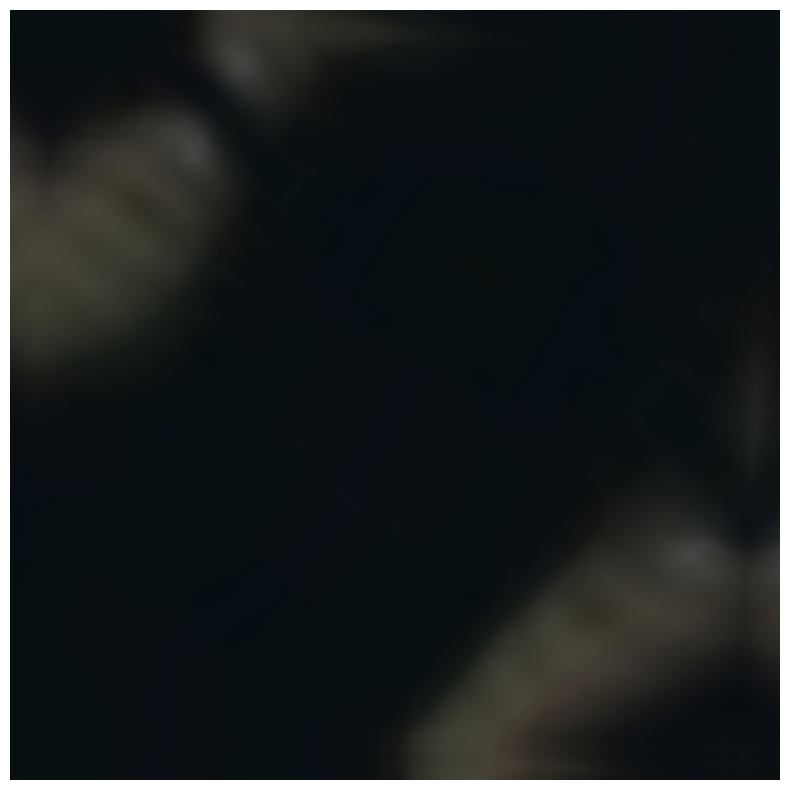

In [105]:
augmented_image = transform(image=ship)['image']
visualize(augmented_image)

In [110]:
import time

In [112]:
while len(os.listdir('ships_aug/')) < 2000:
    im = choice(imgs)
    augmented_image = transform(image=im)['image']
    name = f'augmented_{time.time()}.jpg'
    cv2.imwrite(f'ships_aug/{name}', cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))

KeyboardInterrupt: 